## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

from scipy import stats


### 2. Load the dataset and display a sample of five rows of the data frame.

In [11]:
import os
os.chdir('D:\GreatLearning\GitHub\MachineLearning\Lab 3 - Supervised Learning')
data = pd.read_csv('heart_2020_cleaned.csv')
sample_data = data.sample(5)
print(sample_data)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
111529           No  23.74     Yes             Yes     No             0.0   
311453          Yes  26.04     Yes              No     No             0.0   
280393          Yes  30.81     Yes              No     No             0.0   
224629           No  28.29      No              No     No             0.0   
279231           No  26.63     Yes              No     No            30.0   

        MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
111529           0.0          No    Male        35-39  White       No   
311453           0.0         Yes  Female  80 or older  Black      Yes   
280393           0.0          No    Male        60-64  White       No   
224629           5.0          No    Male        25-29  White       No   
279231          26.0         Yes    Male        45-49  White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
111529            

### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [13]:
print(data.shape)
data.info()

(319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyD

### 4. Check the statistical summary of the dataset and write your inferences.

In [14]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [15]:
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [21]:
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows:{num_duplicates}")

#duplicate_rows = data[data.duplicated()]
#print(duplicate_rows)

data_no_duplicates = data.drop_duplicates()
print(data_no_duplicates.shape)

Number of duplicate rows:18078
(301717, 18)


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


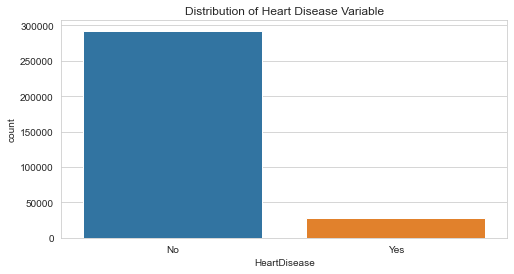

In [23]:
heart_disease_distribution = data['HeartDisease'].value_counts()
print(heart_disease_distribution)

#visual Representation
sns.set_style("whitegrid")

plt.figure(figsize=(8,4))
sns.countplot(x='HeartDisease',data=data)
plt.title('Distribution of Heart Disease Variable')
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

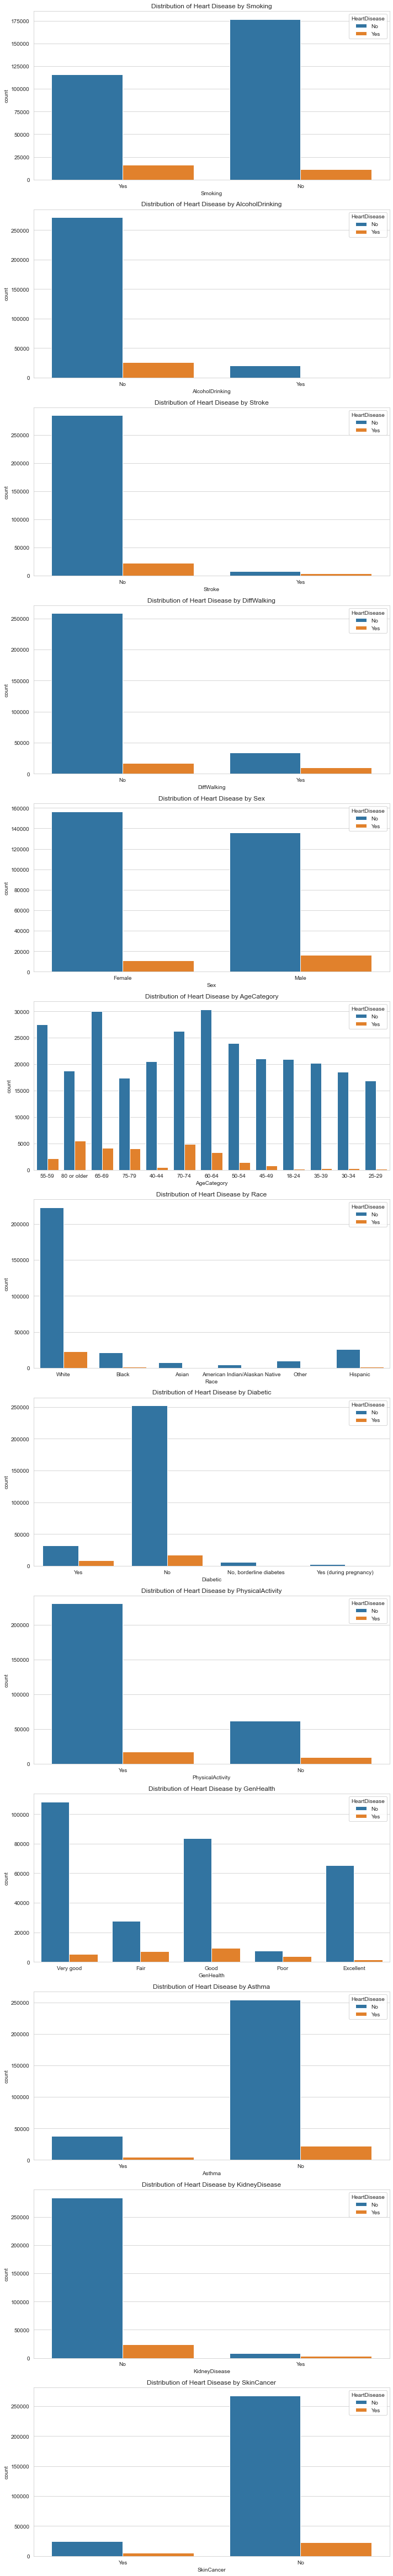

In [25]:
# List of categorical columns 
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

sns.set_style("whitegrid")
fig,axes = plt.subplots(nrows=len(categorical_columns),ncols=1,figsize=(10,5*len(categorical_columns)))

for i,col in enumerate(categorical_columns):
    sns.countplot(data=data,x=col,hue='HeartDisease',ax=axes[i])
    axes[i].set_title(f'Distribution of Heart Disease by {col}')
    axes[i].legend(title='HeartDisease',loc='upper right')
    plt.tight_layout()
    
    
plt.show()



### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [27]:
unique_diabetic = data['Diabetic'].unique()
print(unique_diabetic)
data['Diabetic'] = data['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'})
updated_unique_diabetic = data['Diabetic'].unique()
print(updated_unique_diabetic)



['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [32]:
data['HeartDisease'] = data['HeartDisease'].replace({'No':0,'Yes':1})
#data['HeartDisease'] = data['HeartDisease'].replace({0:'No',1:'Yes'})


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_to_encode = ['AgeCategory','Race','GenHealth']

for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])
    
print(data.head())

already_encoded_or_to_exclude = ['AgeCategory', 'Race', 'GenHealth', 'HeartDisease']
columns_to_dummy_encode = [col for col in data.columns if data[col].dtype == 'object' and col not in already_encoded_or_to_exclude]
data_encoded = pd.get_dummies(data, columns=columns_to_dummy_encode, drop_first=True)
print(data_encoded.head())

   HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0             0  16.60     Yes              No     No             3.0   
1             0  20.34      No              No    Yes             0.0   
2             0  26.58     Yes              No     No            20.0   
3             0  24.21      No              No     No             0.0   
4             0  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory  Race Diabetic  \
0          30.0          No  Female            7     5      Yes   
1           0.0          No  Female           12     5       No   
2          30.0          No    Male            9     5      Yes   
3           0.0          No  Female           11     5       No   
4           0.0         Yes  Female            4     5       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes          4        5.0    Yes            No        Yes  
1       

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [37]:
Y = data_encoded['HeartDisease']
X = data_encoded.drop('HeartDisease',axis=1)

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [39]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (223856, 17)
Shape of X_test: (95939, 17)
Shape of Y_train: (223856,)
Shape of Y_test: (95939,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [40]:
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
scaler = StandardScaler()
X_train.loc[:, numerical_columns] = scaler.fit_transform(X_train.loc[:, numerical_columns])
X_test.loc[:, numerical_columns] = scaler.transform(X_test.loc[:, numerical_columns])


C:\Users\91813\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\91813\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [42]:
from sklearn.metrics import accuracy_score

def train_predict_evaluate(model, X_train,Y_train,X_test, Y_test):
    model.fit(X_train,Y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test,prediction)
    return accuracy


model = LogisticRegression()
accuracy = train_predict_evaluate(model, X_train, Y_train, X_test, Y_test)
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.9138306632339299


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score



models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoost": GradientBoostingClassifier(),   
    "Stacked Classifier": StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier())
        ], final_estimator=LogisticRegression(max_iter=1000))
}

accuracy_scores = {}

for name, model in models.items():
    accuracy = train_predict_evaluate(model, X_train, Y_train, X_test, Y_test)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.9138306632339299
KNN Accuracy: 0.905752613639917
Naive Bayes Accuracy: 0.8433275310353454
Decision Tree Accuracy: 0.8625063842650017
Random Forest Accuracy: 0.9054503382357539
AdaBoost Accuracy: 0.9136117741481566
GradientBoost Accuracy: 0.9149563785321924
Stacked Classifier Accuracy: 0.913674313886949


### Conclusion

----
## Happy Learning:)
----